# **Phase 2 Implementation:**

## **Table of Contents!**

1. Neo4j Setup
2. Community Detection
3. Knowledge Graph Modeling
4. User Interface


### Steps for Community Detection in Job and Skills Graph:

1. **Import Necessary Libraries:**
   Import the required libraries for connecting to Neo4j, creating complex networks, and plotting graphs.

2. **Define Connection Parameters:**
   Define the connection parameters, including the URI, username, and password, for the Neo4j Aura database.

3. **Connect to Neo4j Aura Database:**
   Establish a connection to the Neo4j Aura database using the defined connection parameters.

4. **Retrieve Job and Skills Data:**
   Define a function to execute a Cypher query to fetch job and associated skills data from the Neo4j database.

5. **Create NetworkX Graph:**
   Create an empty NetworkX graph to represent the relationships between jobs and skills.

6. **Fetch Data and Add Nodes/Edges:**
   Fetch data from Neo4j using the defined function and add nodes (jobs and skills) and edges (relationships) to the NetworkX graph.

7. **Close Database Connection:**
   Close the connection to the Neo4j database after data retrieval and graph creation.

8. **Implement Community Detection:**
   Implement a community detection algorithm to identify communities within the graph. Here, the Asynchronous Label Propagation Algorithm (LPA) is used.

9. **Visualize Communities:**
   Visualize the identified communities using a plotting library. The nodes within each community are colored differently for visualization.


In [ ]:
!pip install neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.17.0-py3-none-any.whl size=273834 sha256=f689704021a22a0bfc9391f1cec8e0c09169541923aafe19ac42c3f368c7185b
  Stored in directory: /root/.cache/pip/wheels/26/a1/15/63d729065b1a6a8afce3343003ca05bdbed2c4c05a707da4a3
Successfully built neo4j


This code snippet demonstrates how to connect to a Neo4j database, retrieve data, create a graph using NetworkX, perform community detection, and visualize the communities using matplotlib.

Import necessary libraries: Import the required libraries including GraphDatabase from neo4j, networkx, and matplotlib.pyplot.

Define connection parameters for Neo4j Aura database: Specify the URI, username, and password to connect to the Neo4j Aura database.

Connect to Neo4j Aura database: Establish a connection to the Neo4j Aura database using the provided credentials.

Define a function to retrieve job and skills data from Neo4j: Define a function get_job_skills_data(tx) that executes a Cypher query to fetch job and associated skills data from the Neo4j database.

Create an empty NetworkX graph: Initialize an empty graph G using NetworkX.

Fetch data from Neo4j and add nodes and edges to the graph: Execute the Cypher query using a session and transaction, retrieve the data, and add nodes and edges to the graph G.

Close the Neo4j driver connection: Close the connection to the Neo4j database.

Implement community detection algorithm: Apply the Label Propagation Algorithm (LPA) for community detection using nx.algorithms.community.asyn_lpa_communities(G).

Visualize the communities: Position the nodes using Fruchterman-Reingold force-directed algorithm, create a plot, and draw nodes of each community with distinct colors. Finally, display the plot with a legend showing community labels.

In [ ]:
# Import necessary libraries
from neo4j import GraphDatabase  # Library for connecting to Neo4j
import networkx as nx  # Library for creating and analyzing complex networks
import matplotlib.pyplot as plt  # Library for plotting graphs

# Define connection parameters for Neo4j Aura database
uri = "neo4j+s://28bb9b95.databases.neo4j.io"
username = "neo4j"
password = "luurK_c-i5CZ6WNBFZeGAv-yC9RW9RlRVnTKzVk0rHc"

# Connect to Neo4j Aura database
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to retrieve job and skills data from Neo4j
def get_job_skills_data(tx):
    # Cypher query to fetch job and associated skills data
    result = tx.run("""
    MATCH (job:Job)-[:MATCHES]->(skill:Candidate)
    RETURN job.job ID AS job, COLLECT(skill.Candidate ID) AS skills
    """)
    # Return data as a list of tuples
    return [(record["job"], record["skills"]) for record in result]

# Create an empty NetworkX graph
G = nx.Graph()

# Fetch data from Neo4j and add nodes and edges to the graph
with driver.session() as session:
    data = session.read_transaction(get_job_skills_data)  # Retrieve data using the defined function
    for job, skills in data:
        G.add_node(job)  # Add job node to the graph
        for skill in skills:
            G.add_node(skill)  # Add skill node to the graph
            G.add_edge(job, skill)  # Add edge between job and skill

# Close the Neo4j driver connection
driver.close()

# Implement community detection algorithm
communities = nx.algorithms.community.asyn_lpa_communities(G)  # Using Label Propagation Algorithm

# Visualize the communities
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
plt.figure(figsize=(10, 8))  # Create a new figure for plotting
for i, community in enumerate(communities):
    # Draw nodes of each community with a distinct color
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=f"C{i}", label=f"Community {i+1}")
nx.draw_networkx_edges(G, pos, alpha=0.5)  # Draw edges with reduced opacity
plt.title("Community Detection in Job and Skills Graph")  # Set plot title
plt.legend()  # Show legend
plt.show()  # Display the plot

In [ ]:
pip install graphdatascience

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.17.0-py3-none-any.whl size=273834 sha256=12ed7cdf0746196e0997d191a5c60ae9bd50f93389086170e12cfe655f5e2b78
  Stored in directory: /root/.cache/pip/wheels/26/a1/15/63d729065b1a6a8afce3343003ca05bdbed2c4c05a707da4a3
Successfully built neo4j


In [ ]:
from graphdatascience import GraphDataScience

#### Install neo4j-driver library using pip
#### pip3 install neo4j-driver
#### Run the Python script using Python 3
#### python3 example.py
---
#### Import necessary libraries
#### Connect to Neo4j database with provided credentials
#### Cypher query to retrieve destinations from Denver Airport (DEN)
#### Execute the Cypher query and print the destinations
#### Close the Neo4j driver connection




In [ ]:
# pip3 install neo4j-driver
# python3 example.py

from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
  "neo4j://3.83.90.77:7687",
  auth=basic_auth("neo4j", "man-mailboxes-reinforcements"))

cypher_query = '''
MATCH (a:Airport{iata:$iata})-[r:HAS_ROUTE]->(other)
  RETURN other.iata as destination
'''

with driver.session(database="neo4j") as session:
  results = session.read_transaction(
    lambda tx: tx.run(cypher_query,
                      iata="DEN").data())
  for record in results:
    print(record['destination'])

driver.close()


<ipython-input-6-d5352f95ca5c>:16: DeprecationWarning: read_transaction has been renamed to execute_read
  results = session.read_transaction(


TUL
XNA
CAK
ATW
KOA
CLE
KEF
ALS
ATL
DDC
BUF
CHS
CYS
BFM
DAY
PGA
ONT
FSD
RAP
MCI
BFL
PNS
SHV
CEZ
PVR
GCM
ISN
AUS
MAF
BKG
TYS
OGG
MKE
DFW
HNL
IAH
GJT
JFK
SNA
YVR
JMS
MCO
PTY
RIW
DTW
RNO
AVL
BLI
PHL
MRY
CID
YMM
HSV
CVG
VPS
FCA
ACV
CDG
FLG
PRC
PIA
AIA
BZN
SFO
BOI
XWA
ICT
SUN
MTJ
YWG
SAN
MEX
SAV
YQR
MLI
PSC
IND
OKC
EGE
GSO
COD
ZRH
ORD
LIR
BMI
FAR
ANC
BDL
MTY
CDR
SMF
FMN
ORF
EWR
JAC
ASE
BTV
YEG
ELP
SJO
BFF
LAS
RIC
PHX
YXE
JAN
PHF
FRA
MOT
PIT
MEM
COU
CPR
SGF
RKS
MSP
BIS
GCC
GDL
SJD
MSN
PVD
PBI
LIT
RDM
BWI
PSP
RSW
TUS
MIA
SBP
SDF
COS
LNK
CMH
JAX
OMA
GRR
SLC
LBF
FLL
SLN
MDT
STS
LIH
YUL
MCK
MYR
LGW
LAX
BNA
STL
SAT
PAE
GEG
NRT
IDA
VEL
EUG
BZE
MFR
PIR
HYS
ABQ
GTF
CUN
SAF
MMH
TEX
CNY
DAL
LHR
CLT
RDU
LFT
DIK
SHR
MUC
PUB
YYZ
GSP
PDX
LBL
GUC
SEA
YYC
LBB
MSY
SBA
GRB
HRL
BUR
LGA
BOS
SJC
EAR
AMA
BHM
CZM
DCA
SGU
HDN
HOU
BIL
OAK
DSM
PWM
DRO
MSO
SYR
HLN
FAT
IAD
LAR
MDW
TPA


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

uri = "neo4j+s://b67ccf50.databases.neo4j.io"
username = "neo4j"
password = "J6wAqfUdmCeSUmV-GcZbAIoHgesvk9xhM2Re3oO9oOc"

jobs_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
candidates_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')
# Connect to the Neo4j database
with GraphDatabase.driver(uri, auth=(username, password)) as driver:
    with driver.session() as session:
        # Create nodes for jobs
        for index, job in jobs_df.iterrows():
            create_job_query = """
                MERGE (j:Job {job_id: $job_id, title: $title, skills: $skills, experience: $experience, major: $major, location: $location})
            """
            session.run(create_job_query, job_id=job['Job ID'], title=job['Job Title'], skills=job['Required Skills'], experience=job['Experience Needed'], major=job['Major'], location=job['Location'])

        # Create nodes for candidates
        for index, candidate in candidates_df.iterrows():
            create_candidate_query = """
                MERGE (c:Candidate {candidate_id: $candidate_id, name: $name, skills: $skills, experience: $experience, major: $major, location: $location})
            """
            session.run(create_candidate_query, candidate_id=candidate['Candidate ID'], name=candidate['Name'], skills=candidate['Skills'], experience=candidate['Experience'], major=candidate['Major'], location=candidate['Location'])

        # Create relationships based on common attributes
        create_relationship_query = """
            MATCH (j:Job), (c:Candidate)
            WHERE j.skills CONTAINS c.skills
                AND j.experience >= c.experience
                AND j.location = c.location
            MERGE (j)-[:REQUIRES_COMMON_ATTRIBUTES]->(c)
        """
        session.run(create_relationship_query)

In [ ]:
import pandas as pd
import numpy as np

The line df = pd.read_csv("/content/job_descriptions - job_descriptions.csv") is a Python code snippet that reads a CSV file named "job_descriptions - job_descriptions.csv" and loads its contents into a pandas DataFrame object named df.

In [ ]:
df= pd.read_csv("/content/job_descriptions - job_descriptions.csv")

In [ ]:
df.head()

,Job ID,Job Title,Required Skills,Experience Needed,Major,City,State,Country
0,J1000,Lead IT,"Random Search, Test-Driven Development (TDD), ...",14,Biotechnology,Montreal,Quebec,Canada
1,J1001,IT Systems Administrator,"Moqups, Metabolomics, Journey Mapping, Deep Le...",4,Neuroscience,San Francisco,California,USA
2,J1002,IT Auditor,"Virtualization, Independent Component Analysis...",13,Business Analytics,New York City,New York,USA
3,J1003,IT Technical Support Specialist,"Prioritization, Liquidity Mining, Data Present...",9,Game Development,New York City,New York,USA
4,J1004,IT Customer Support,"Delegated Proof of Stake (DPoS), Behavior-Driv...",15,Chemical Engineering,Charlottetown,Prince Edward Island,Canada


In [ ]:
df['Required Skills']

0      Random Search, Test-Driven Development (TDD), ...
1      Moqups, Metabolomics, Journey Mapping, Deep Le...
2      Virtualization, Independent Component Analysis...
3      Prioritization, Liquidity Mining, Data Present...
4      Delegated Proof of Stake (DPoS), Behavior-Driv...
                             ...                        
995    Bootstrapping, Business Continuity Planning (B...
996    Decentralized Finance (DeFi), Human Resource M...
997    FTP/SFTP, Test-Driven Development (TDD), Grid ...
998    Graph Analytics, Incident Management, Knowledg...
999    Human Resource Management (HRM), Utility Token...
Name: Required Skills, Length: 1000, dtype: object

In [ ]:
df['Required Skills'][4]

'Delegated Proof of Stake (DPoS), Behavior-Driven Development (BDD), Smart Contract Platforms, Decision-Making, NFT Wallets, Web Scraping, Machine Translation, Containerization, Object-Oriented Programming (OOP), Film Rights'

In [ ]:
max_skills

10

In [ ]:
df['Required Skills'] = df['Required Skills'].str.split(', ')

# Create new columns for each item
df[['Skill1', 'Skill2', 'Skill3', 'Skill4','Skill5','Skill6','Skill7','Skill8','Skill9','Skill10']] = df['Required Skills'].apply(pd.Series)

# Optionally, you can drop the original 'skills' column if needed
df = df.drop('Required Skills', axis=1)

# Display the resulting DataFrame
print(df)

    Job ID                        Job Title  Experience Needed  \
0    J1000                          Lead IT                 14   
1    J1001         IT Systems Administrator                  4   
2    J1002                       IT Auditor                 13   
3    J1003  IT Technical Support Specialist                  9   
4    J1004              IT Customer Support                 15   
..     ...                              ...                ...   
995  J1995               Software Developer                  4   
996  J1996             IT Technical Support                  9   
997  J1997                      IT Director                  3   
998  J1998         Infrastructure Architect                  4   
999  J1999        Digital Forensics Analyst                  5   

                                    Major           City  \
0                           Biotechnology       Montreal   
1                            Neuroscience  San Francisco   
2                      Busi

In [ ]:
df.to_csv('output_file.csv', index=False)

In [ ]:
Skill1= df.filter(['Job ID','Skill1'], axis=1)
Skill2= df.filter(['Job ID','Skill2'], axis=1)
Skill3= df.filter(['Job ID','Skill3'], axis=1)
Skill4= df.filter(['Job ID','Skill4'], axis=1)
Skill5= df.filter(['Job ID','Skill5'], axis=1)
Skill6= df.filter(['Job ID','Skill6'], axis=1)
Skill7= df.filter(['Job ID','Skill7'], axis=1)
Skill8= df.filter(['Job ID','Skill8'], axis=1)
Skill9= df.filter(['Job ID','Skill9'], axis=1)
Skill10= df.filter(['Job ID','Skill10'], axis=1)

In [ ]:
Skill1

,Job ID,Skill1
0,J1000,Random Search
1,J1001,Moqups
2,J1002,Virtualization
3,J1003,Prioritization
4,J1004,Delegated Proof of Stake (DPoS)
...,...,...
995,J1995,Bootstrapping
996,J1996,Decentralized Finance (DeFi)
997,J1997,FTP/SFTP
998,J1998,Graph Analytics


In [ ]:
Skill1=Skill1.rename(columns={"Skill1": "Skills"})
Skill2=Skill2.rename(columns={"Skill2": "Skills"})
Skill3=Skill3.rename(columns={"Skill3": "Skills"})
Skill4=Skill4.rename(columns={"Skill4": "Skills"})
Skill5=Skill5.rename(columns={"Skill5": "Skills"})
Skill6=Skill6.rename(columns={"Skill6": "Skills"})
Skill7=Skill7.rename(columns={"Skill7": "Skills"})
Skill8=Skill8.rename(columns={"Skill8": "Skills"})
Skill9=Skill9.rename(columns={"Skill9": "Skills"})
Skill10=Skill10.rename(columns={"Skill10": "Skills"})


In [ ]:
Skill5

,Job ID,Skills
0,J1000,NaN
1,J1001,Negotiation Skills
2,J1002,Waterfall Methodology
3,J1003,NaN
4,J1004,NFT Wallets
...,...,...
995,J1995,Domain Adaptation
996,J1996,Supervised Learning
997,J1997,Threat Intelligence
998,J1998,GDPR


In [ ]:
Skill1.to_csv('Skill1.csv', index=False)
Skill2.to_csv('Skill2.csv', index=False)
Skill3.to_csv('Skill3.csv', index=False)
Skill4.to_csv('Skill4.csv', index=False)
Skill5.to_csv('Skill5.csv', index=False)
Skill6.to_csv('Skill6.csv', index=False)
Skill7.to_csv('Skill7.csv', index=False)
Skill8.to_csv('Skill8.csv', index=False)
Skill9.to_csv('Skill9.csv', index=False)
Skill10.to_csv('Skill10.csv', index=False)

For resume

In [ ]:
df1=pd.read_csv("/content/Resume_Processed - Resume_Processed.csv")

In [ ]:
df1

,Candidate ID,Name,Skills,Experience,Major,City,State,Country
0,C1000,Ananya Desai,Supervisory Control and Data Acquisition (SCAD...,5,Biomedical Engineering,Salt Lake City,Utah,USA
1,C1001,Oscar Cooper,"Procurement, Design Patterns, Chaincode, Cross...",4,Information Systems,Boston,Massachusetts,USA
2,C1002,Brianna Phillips,"Session Hijacking, Scheduling, Fuzzy Clusterin...",14,Geographic Information Systems (GIS),Fredericton,New Brunswick,Canada
3,C1003,Tanvi Gupta,"Part-of-Speech (POS) Tagging, Seaborn, Securit...",10,Artificial Intelligence,St. Louis,Missouri,USA
4,C1004,Tara Menon,"Scrum Master, Speech Recognition, Conversation...",10,Chemical Engineering,Miami,Florida,USA
...,...,...,...,...,...,...,...,...
995,C1995,Oscar Cooper,"Configuration Management, API Documentation, A...",6,Physics,Denver,Colorado,USA
996,C1996,Caleb Johnson,"Graph Isomorphism, Clinical Trials, Principal ...",15,Pharmaceutical Sciences,Seattle,Washington,USA
997,C1997,Jacob Garcia,Supervisory Control and Data Acquisition (SCAD...,15,Environmental Science,Toronto,Ontario,Canada
998,C1998,Olivia Johnson,"Data Collection, Polynomial Regression, Sequen...",4,Bioinformatics,Chicago,Illinois,USA


In [ ]:
num_skills = 10

In [ ]:
df1[['Skill1', 'Skill2', 'Skill3', 'Skill4','Skill5','Skill6','Skill7','Skill8','Skill9','Skill10']] = df1['Skills'].apply(lambda x: pd.Series(x.split(', ')[:num_skills]))
df1 = df1.drop('Skills', axis=1)
# Display the resulting DataFrame
print(df1)

    Candidate ID              Name  Experience  \
0          C1000      Ananya Desai           5   
1          C1001      Oscar Cooper           4   
2          C1002  Brianna Phillips          14   
3          C1003       Tanvi Gupta          10   
4          C1004        Tara Menon          10   
..           ...               ...         ...   
995        C1995      Oscar Cooper           6   
996        C1996     Caleb Johnson          15   
997        C1997      Jacob Garcia          15   
998        C1998    Olivia Johnson           4   
999        C1999       Taylor Wong          13   

                                    Major            City          State  \
0                  Biomedical Engineering  Salt Lake City           Utah   
1                     Information Systems          Boston  Massachusetts   
2    Geographic Information Systems (GIS)     Fredericton  New Brunswick   
3                 Artificial Intelligence       St. Louis       Missouri   
4                  

In [ ]:
R_Skill1= df1.filter(['Candidate ID','Skill1'], axis=1)
R_Skill2= df1.filter(['Candidate ID','Skill2'], axis=1)
R_Skill3= df1.filter(['Candidate ID','Skill3'], axis=1)
R_Skill4= df1.filter(['Candidate ID','Skill4'], axis=1)
R_Skill5= df1.filter(['Candidate ID','Skill5'], axis=1)
R_Skill6= df1.filter(['Candidate ID','Skill6'], axis=1)
R_Skill7= df1.filter(['Candidate ID','Skill7'], axis=1)
R_Skill8= df1.filter(['Candidate ID','Skill8'], axis=1)
R_Skill9= df1.filter(['Candidate ID','Skill9'], axis=1)
R_Skill10= df1.filter(['Candidate ID','Skill10'], axis=1)


In [ ]:
R_Skill1=R_Skill1.rename(columns={"Skill1": "Skills"})
R_Skill2=R_Skill2.rename(columns={"Skill2": "Skills"})
R_Skill3=R_Skill3.rename(columns={"Skill3": "Skills"})
R_Skill4=R_Skill4.rename(columns={"Skill4": "Skills"})
R_Skill5=R_Skill5.rename(columns={"Skill5": "Skills"})
R_Skill6=R_Skill6.rename(columns={"Skill6": "Skills"})
R_Skill7=R_Skill7.rename(columns={"Skill7": "Skills"})
R_Skill8=R_Skill8.rename(columns={"Skill8": "Skills"})
R_Skill9=R_Skill9.rename(columns={"Skill9": "Skills"})
R_Skill10=R_Skill10.rename(columns={"Skill10": "Skills"})



In [ ]:
R_Skill5

,Candidate ID,Skills
0,C1000,State Channels
1,C1001,IPSec
2,C1002,Secure Coding Practices
3,C1003,Web Development
4,C1004,Link Prediction
...,...,...
995,C1995,Manufacturing Execution Systems (MES)
996,C1996,Transfer Learning
997,C1997,Cryptocurrency
998,C1998,Graph Coloring


In [ ]:
R_Skill1.to_csv('Skill1_resume.csv', index=False)
R_Skill2.to_csv('Skill2_resume.csv', index=False)
R_Skill3.to_csv('Skill3_resume.csv', index=False)
R_Skill4.to_csv('Skill4_resume.csv', index=False)
R_Skill5.to_csv('Skill5_resume.csv', index=False)
R_Skill6.to_csv('Skill6_resume.csv', index=False)
R_Skill7.to_csv('Skill7_resume.csv', index=False)
R_Skill8.to_csv('Skill8_resume.csv', index=False)
R_Skill9.to_csv('Skill9_resume.csv', index=False)
R_Skill10.to_csv('Skill10_resume.csv', index=False)

In [ ]:
df1.to_csv('Resume_edited.csv', index=False)

In [ ]:
!pip install graphdatascience

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.0/198.0 kB 19.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.18.0-py3-none-any.whl size=273862 sha256=db825746fb4e3e0c83e0852b1c0ab5f0c55363f296b4e6e2e42ba462a57d1bda
  Stored in directory: /root/.cache/pip/wheels/e7/e1/a0/dd7c19192f5383ff57d02a6c126cbfe4b7b2ae82f70c6994ce
Successfully built neo4j


##GDS Recommendation algorithm
### Step 1: Import the necessary libraries

### Step 2: Import the GraphDataScience class from the graphdatascience module
###        for interacting with Neo4j databases

### Step 3: Import the pandas library for data manipulation


In [ ]:
from graphdatascience import GraphDataScience
import pandas as pd

# Connecting with the Neo4j database using GDS library

gds = GraphDataScience("neo4j+s://4da75e81.databases.neo4j.io",auth=("neo4j","N-1m1CV2aCuKOqzGmo95UIQR3qgZZWKz9nrishPiSBs"))


This code snippet is using the Graph Data Science (GDS) library in Neo4j to create a link prediction pipeline named 'pipe2'.

Running the Cypher query using the GDS library:
The code gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.create('pipe2')""") executes a Cypher query to create a link prediction pipeline named 'pipe2' using the GDS library. This call sets up the pipeline for performing link prediction tasks.

Getting the output as a DataFrame:
The output of the Cypher query executed using the GDS library would typically be returned as a DataFrame. However, the code snippet does not explicitly save the output DataFrame into a variable

In [ ]:
# When we run the cypher query using gds library, we would get an output
# in the form of a dataframe, you can save it in a variable to know more details

gds.run_cypher("""
CALL gds.beta.pipeline.linkPrediction.create('pipe2')
""")

,name,nodePropertySteps,featureSteps,splitConfig,autoTuningConfig,parameterSpace
0,pipe2,[],[],"{'testFraction': 0.1, 'validationFolds': 3, 't...",{'maxTrials': 10},"{'MultilayerPerceptron': [], 'RandomForest': [..."


In [ ]:
gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addNodeProperty('pipe2', 'fastRP', {
  mutateProperty: 'embedding',
  embeddingDimension: 256,
  randomSeed: 42
})""")

,name,nodePropertySteps,featureSteps,splitConfig,autoTuningConfig,parameterSpace
0,pipe2,"[{'name': 'gds.fastRP.mutate', 'config': {'ran...",[],"{'testFraction': 0.1, 'validationFolds': 3, 't...",{'maxTrials': 10},"{'MultilayerPerceptron': [], 'RandomForest': [..."


In [ ]:

gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addFeature('pipe2', 'hadamard', {
  nodeProperties: ['embedding']
}) YIELD featureSteps""")


,featureSteps
0,"[{'name': 'HADAMARD', 'config': {'nodeProperti..."


In [ ]:
gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.configureSplit('pipe2', {
  testFraction: 0.25,
  trainFraction: 0.6,
  validationFolds: 3
})
YIELD splitConfig""")

,splitConfig
0,"{'testFraction': 0.25, 'validationFolds': 3, '..."



This code snippet is using the Graph Data Science (GDS) library in Neo4j to set up a pipeline for link prediction using logistic regression.

Adding the model to the pipeline:
The first part of the code gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('pipe2') YIELD parameterSpace""") adds a logistic regression model to the pipeline named 'pipe2'. This call sets up the initial configuration for the logistic regression model and returns the parameter space.

Adding hyperparameters to be used:
The second part of the code gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('pipe2', {maxEpochs: 800, penalty: {range: [1e-4, 1e2]}}) YIELD parameterSpace RETURN parameterSpace.LogisticRegression AS logisticRegressionSpace""") adds hyperparameters to the logistic regression model already added to the pipeline. In this case, it specifies the maximum number of epochs (maxEpochs) as 800 and sets up a range of penalty values (penalty) from 1e-4 to 1e2. The call returns the updated parameter space for the logistic regression model.

In summary, these two calls configure a pipeline for link prediction using logistic regression in Neo4j's Graph Data Science library. The first call sets up the basic model, while the second call adds hyperparameters to the model to customize its behavior.

In [ ]:
# Adding the model to pipeline
gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('pipe2')
YIELD parameterSpace""")

# Adding hyperparameters to be used
gds.run_cypher("""CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('pipe2', {maxEpochs: 800, penalty: {range: [1e-4, 1e2]}})
YIELD parameterSpace
RETURN parameterSpace.LogisticRegression AS logisticRegressionSpace""")

,logisticRegressionSpace
0,"[{'minEpochs': 1, 'maxEpochs': 100, 'focusWeig..."


In [ ]:
gds.run_cypher("""CALL gds.alpha.pipeline.linkPrediction.configureAutoTuning('pipe2', {
  maxTrials: 3
}) YIELD autoTuningConfig""")

,autoTuningConfig
0,{'maxTrials': 3}


## User InterFace:

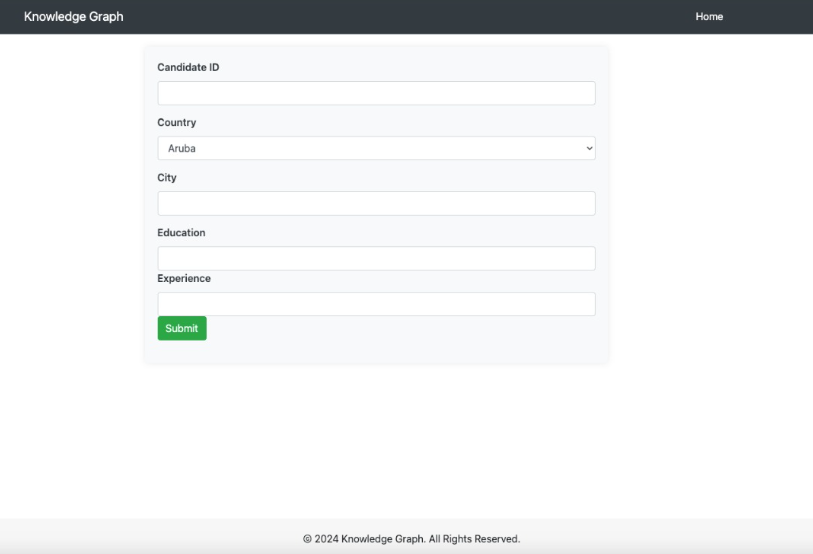

# **Summary of phase 2**:

Setting up Neo4j Database:

The project starts by connecting to a Neo4j database using the Graph Database (GDB) API provided by the Neo4j Python driver.
The database connection is established using authentication credentials such as URI, username, and password.
Data Retrieval and Graph Creation:

Cypher queries are executed to retrieve data from the Neo4j database.
The retrieved data, likely representing relationships between entities (e.g., jobs and skills), is used to create a graph using the NetworkX library.
Nodes in the graph represent entities (e.g., jobs, skills), and edges represent relationships between them.
Graph Analysis and Community Detection:

The NetworkX library is used for graph analysis, and specifically, community detection algorithms are applied to identify groups of closely connected nodes (communities) within the graph.
Algorithms such as Label Propagation Algorithm (LPA) may be employed for community detection.
Visualization:

The detected communities within the graph are visualized using the matplotlib library.
Nodes belonging to different communities are typically represented using different colors or markers to visually distinguish them.
Pipeline Setup for Link Prediction:

The GDS library is utilized to set up a pipeline for link prediction tasks.
This involves configuring a pipeline with specific models and hyperparameters, such as logistic regression models, and defining the parameters and options for the models.
Pipeline Execution:

Cypher queries are executed using the GDS library to perform link prediction tasks within the established pipeline.
The results of these queries are typically returned as DataFrames, which can be further analyzed or processed as needed.
Overall Objective:

The project likely aims to leverage graph-based analysis techniques and machine learning models to extract insights from the data stored in the Neo4j database.
It may involve tasks such as identifying patterns in relationships between entities, predicting new relationships, or clustering entities based on their similarities or connections.
In summary, the project combines graph database technology (Neo4j) with graph analysis and machine learning techniques (using libraries such as NetworkX and GDS) to analyze and extract insights from complex relational data.